## 1. Загрузка данных

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Загрузим данные и изучим их состояние.

In [4]:
df = pd.read_csv('./insurance.csv')
print(df)

      Unnamed: 0  Пол  Возраст  Зарплата  Члены семьи  Страховые выплаты
0              0    1     41.0   49600.0            1                  0
1              1    0     46.0   38000.0            1                  1
2              2    0     29.0   21000.0            0                  0
3              3    0     21.0   41700.0            2                  0
4              4    1     28.0   26100.0            0                  0
...          ...  ...      ...       ...          ...                ...
4995        4995    0     28.0   35700.0            2                  0
4996        4996    0     34.0   52400.0            1                  0
4997        4997    0     20.0   33900.0            2                  0
4998        4998    1     22.0   32700.0            3                  0
4999        4999    1     28.0   40600.0            1                  0

[5000 rows x 6 columns]


In [3]:
display(df.describe().T)
display(df.info())

,count,mean,std,min,25%,50%,75%,max
Пол,5000.0,0.4990,0.500049,0.0,0.0,0.0,1.0,1.0
Возраст,5000.0,30.9528,8.440807,18.0,24.0,30.0,37.0,65.0
Зарплата,5000.0,39916.3600,9900.083569,5300.0,33300.0,40200.0,46600.0,79000.0
Члены семьи,5000.0,1.1942,1.091387,0.0,0.0,1.0,2.0,6.0
Страховые выплаты,5000.0,0.1480,0.463183,0.0,0.0,0.0,0.0,5.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
Пол                  5000 non-null int64
Возраст              5000 non-null float64
Зарплата             5000 non-null float64
Члены семьи          5000 non-null int64
Страховые выплаты    5000 non-null int64
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


None

Проверим распределение данных

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe37ec6c2b0>,
      dtype=object)

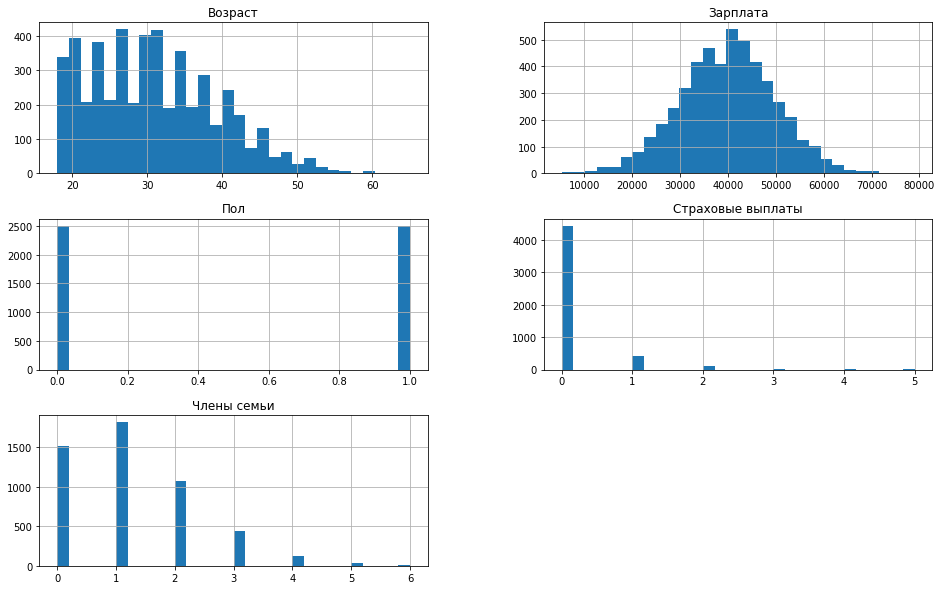

In [4]:
fig = plt.figure(figsize = (16, 10))
ax = fig.gca()
df.hist(figsize=(16,5), ax = ax, bins=30)

Похоже, что все хорошо и дополнительная обработка данных не нужна

<font color="blue">Отлично

## 2. Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:**  
Нет, не изменится  
**Обоснование:**  
Допустим, что качество изменится.  
Умножим формулу предсказания на матрицу Р и сравним ее с неизмененной формулой.  


$$
(PX)(P𝑤)\not{=} 𝑋𝑤 
$$
Разложим неравенство по формуле обучения

$$
PX  (Р^{T}X^{T} PX)^{-1} P^{T}X^{T} y \not{=} X(X^T X)^{-1} X^T y
$$


$$
PX  (Р^{T}(X^{T}) (PX))^{-1} P^{T}X^{T} y \not{=} X(X^T X)^{-1} X^T y
$$

Разложим обратную от произведения матриц как произведение обратных матриц


$$
PX (PX)^{-1} (Р^{T}X^{T})^{-1}  P^{T}X^{T} y \not{=} X X^{-1} (X^T)^{-1} X^T y
$$

Сделаем аналогичное для обратных матриц

$$
PX X^{-1} P^{-1} X^{-1T} Р^{-1T}  P^{T}X^{T} y \not{=} X X^{-1} (X^T)^{-1} X^T y
$$

$$
P E P^{-1} X^{-1T} E X^{T} y \not{=} X X^{-1} (X^T)^{-1} X^T y
$$

$$
P P^{-1} X^{-1T} X^{T} y \not{=} X X^{-1} (X^T)^{-1} X^T y
$$

Полученное неравенство сократим до единичных матриц

$$
E E y \not{=} E E y
$$
$$
y \not{=} y
$$
Сократив уравнение получим противоречие. Значит, при умножение на обратимую матрицу признаков модели - предсказания не изменятся.

Осталось понять как будет связана новая матрица с оригинальной.  
Имеем $A  B = C$,  
где А - исходная матрица  
В - матрица пребразования  
С - новая матрица  

умножим обе стороны на $B^{-1}$,  получим
$$
A B B^{-1} = C  B^{-1}  
$$
$$
A E= C  B^{-1}
$$
$$
A = C B^{-1}
$$

значит, чтобы получить исходную матрицу из новой, достаточно будет умножить новую на исходную

## 3. Алгоритм преобразования

**Алгоритм**

На вход функции преобразования поступает исходная матрица с данными. В функции вычисляется ширина (n) полученной матрицы и генерируется новая обратимая матрица размера n. Умножив сгенерированную матрицу на исходную получим необходимый шифрованный набор данных. 

**Обоснование**

Т.к. мы генерируем обратимую матрицу, мы можем быть уверены, что согласно обоснованию выше у нас получится сократить формулу до единичной матрицы.  
Т.к. шанс генерации необратимой матрицы близок к нулю можем опустить обработку случаев генерации необратимой матрицы.

## 4. Проверка алгоритма

Вынесем функцию перемножения полученной на входе матрицы на случайную, но одинаковую по ширине матрицы

In [5]:
def matrix_transform(matrix_orig):
    n = matrix_orig.shape[1]
    det_a = 0
    while det_a == 0:
        a = np.random.randn(n, n)
        det_a = np.linalg.det(a)
    
    return matrix_orig @ a

Вынесем функцию вычисления rmse линейной регрессии на входных данных

In [9]:
def model_check(features, target):
    model = LinearRegression()
    features_train, features_valid, target_train, target_valid = train_test_split(features, 
                                                                              target, 
                                                                              test_size=0.25, 
                                                                              random_state = 123)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    matrix_transform(features_train.values)
    rmse = mean_squared_error(target_valid, predicted_valid) ** 0.5
    print("rmse:", rmse)

Выполним проверку на оригинальных данных.

In [10]:
target = df["Страховые выплаты"]
features = df.drop(["Страховые выплаты"], axis = 1)

model_check(features, target)

rmse: 0.358808094067641


А теперь предварительно изменим нашу матрицу признаков.

In [11]:
target = df["Страховые выплаты"]
features = df.drop(["Страховые выплаты"], axis = 1)

features = matrix_transform(features)

model_check(features, target)

rmse: 0.35880809406736097


Получим практически одинаковые значения. Незначительная разница объясняется возможными ошибками округления при операциях с плавающей точкой (умножение сгенерированой матрицы на оригинальную)

Т.е. отправляя признаки для генерации предсказаний их легко можно зашифровать умножив на обратимую матрицу одинаковую по ширине.  

Получить изначальные данные из зашифрованной таблице можно перемножив на обратную матрицу от той, что использовали для шифрования.